Loading the dataset


In [1]:
!pip install --upgrade --no-cache-dir gdown

In [2]:
! gdown --id 1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
! gdown --id 1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
! gdown --id 1oiVQignVg1wvE1LXKFvOLHPl0P8GNSDp

! gdown --id 1HofeiIpUTM2MOeCXU7UVmBsoHfpwytwD
! gdown --id 1C4vxrdTjUwVaBeFGjN7XOTR-fn2r0v9R

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
To: /content/train.csv
100% 98.6M/98.6M [00:01<00:00, 86.6MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 49.1MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://

In [3]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
train_data = pd.read_csv("train.csv")
test_data1 = pd.read_csv("test.csv")
test_data = pd.read_csv("test.csv")
submit_data = pd.read_csv("submit.csv")

test_data = test_data.join(submit_data["label"])

train_data["author"].fillna("-NO AUTHOR-", inplace = True)
test_data["author"].fillna("-NO AUTHOR-", inplace = True)

train_data.dropna(inplace=True)
train_data.drop(train_data.loc[train_data['text']==" "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="  "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="\n"].index, inplace=True)

# Resetting index
train_data.reset_index(inplace=True)
train_data= train_data.apply(lambda x: x.astype(str).str.lower())
train_data = train_data.drop(columns=["id", "index"])


# Removing null values
test_data.dropna(inplace=True)
test_data.drop(test_data.loc[test_data['text']==" "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="  "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="\n"].index, inplace=True)



# Resetting index
test_data.reset_index(inplace=True)
test_data= test_data.apply(lambda x: x.astype(str).str.lower())

test_data = test_data.drop(columns=["id","index"])


transformed_df = pd.read_csv("preprocessed_train2.csv")
transformed_df_test = pd.read_csv("preprocessed_test2.csv")

X_test = transformed_df_test.values
y_test = test_data["label"].values 

X = transformed_df.values
# X_cv = transformed_df_count_vectorizer.values
y = train_data["label"].values 


K Fold

In [5]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
# X_train_cv=[]
# X_val_cv=[]
y_train=[]
y_val=[]

for train_index, test_index in kf.split(X_train1,y_train1):
  X_train.append(X_train1[train_index])
  X_val.append(X_train1[test_index]) 
  # X_train_cv.append(X_cv[train_index])
  # X_val_cv.append(X_cv[test_index]) 
  y_train.append(y_train1[train_index])
  y_val.append(y_train1[test_index])

In [6]:
test_data1 = test_data1.apply(lambda x: x.astype(str).str.lower())


In [7]:
stop_words_set = set(stopwords.words('english'))
sw_removed_test = []

for i in range(len(test_data1)):
    review = re.sub('[^a-zA-Z]',' ',test_data1['text'][i])
    review = review.split()
    review = [word for word in review if not word in stop_words_set]
    statements = ' '.join(review)
    sw_removed_test.append(statements)

In [8]:
ps = PorterStemmer()
stemmed_test = []

for i in range(len(sw_removed_test)):
  sw_removed_1 = sw_removed_test[i].split()
  stem = [ps.stem(word) for word in sw_removed_1]
  st = ' '.join(stem)
  stemmed_test.append(st)

In [9]:
preprocess_arr_test = np.array(stemmed_test)
preprocess_df_test = pd.DataFrame(preprocess_arr_test)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


tfidf_vectorizer_test = TfidfVectorizer(ngram_range=(1,3), max_features=3000)

# train_input = vectorizer.fit_transform(preprocess_arr).toarray()
test_input_tfidf_vectorizer = tfidf_vectorizer_test.fit_transform(preprocess_arr_test).toarray()

# transformed_df = pd.DataFrame(data=train_input, columns=vectorizer.get_feature_names())
transformed_df_count_vectorizer_test = pd.DataFrame(data=test_input_tfidf_vectorizer, columns=tfidf_vectorizer_test.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
X_test = transformed_df_count_vectorizer_test.values
X_test.shape

(5200, 3000)

# Naive Bayes

Hyperparameter Tuning

In [12]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 6.8 MB/s 


In [13]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


search_space = {'var_smoothing': np.logspace(-5,-9, num=10)}

from sklearn.decomposition import PCA


pca = PCA(n_components=100)
pca_X = pca.fit_transform(X)



In [14]:
GNB_bayes_search = BayesSearchCV(gnb, search_space, n_iter=16, n_jobs=-1, cv=5)

GNB_bayes_search.fit(pca_X, y)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=5, estimator=GaussianNB(), n_iter=16, n_jobs=-1,
              search_spaces={'var_smoothing': array([1.00000000e-05, 3.59381366e-06, 1.29154967e-06, 4.64158883e-07,
       1.66810054e-07, 5.99484250e-08, 2.15443469e-08, 7.74263683e-09,
       2.78255940e-09, 1.00000000e-09])})

In [15]:
GNB_best_params = GNB_bayes_search.best_params_
GNB_best_params

OrderedDict([('var_smoothing', 1e-09)])

In [16]:
GNB_best_model = GNB_bayes_search.best_estimator_
GNB_best_model

GaussianNB()

In [17]:
print(GNB_bayes_search.best_score_)

0.8176490945500211


In [18]:
from sklearn.naive_bayes import GaussianNB
gnb_0 = GaussianNB(var_smoothing=2.7825594022071257e-09)
gnb_1 = GaussianNB(var_smoothing=2.7825594022071257e-09)
gnb_2 = GaussianNB(var_smoothing=2.7825594022071257e-09)
gnb_3 = GaussianNB(var_smoothing=2.7825594022071257e-09)
gnb_4 = GaussianNB(var_smoothing=2.7825594022071257e-09)

gnb_0.fit(X_train[0],y_train[0].astype('int'))
gnb_1.fit(X_train[1],y_train[1].astype('int'))
gnb_2.fit(X_train[2],y_train[2].astype('int'))
gnb_3.fit(X_train[3],y_train[3].astype('int'))
gnb_4.fit(X_train[4],y_train[4].astype('int'))

y_pred_0 = gnb_0.predict(X_val[0])
y_pred_1 = gnb_1.predict(X_val[1])
y_pred_2 = gnb_2.predict(X_val[2])
y_pred_3 = gnb_3.predict(X_val[3])
y_pred_4 = gnb_4.predict(X_val[4])


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Comparing the 5 Naive Bayes models on resp. val set')

print('\nAverage of the evaluation Metrics for the Models:')
print("Accuracy: ", (accuracy_score(y_val[0].astype('int'), y_pred_0) + accuracy_score(y_val[1].astype('int'), y_pred_1) + accuracy_score(y_val[2].astype('int'), y_pred_2) + accuracy_score(y_val[3].astype('int'), y_pred_3) + accuracy_score(y_val[4].astype('int'), y_pred_4))/5)
print("Precision: ", (precision_score(y_val[0].astype('int'), y_pred_0) + precision_score(y_val[1].astype('int'), y_pred_1) + precision_score(y_val[2].astype('int'), y_pred_2) + precision_score(y_val[3].astype('int'), y_pred_3) + precision_score(y_val[4].astype('int'), y_pred_4))/5)
print("Recall: ", (recall_score(y_val[0].astype('int'), y_pred_0) + recall_score(y_val[1].astype('int'), y_pred_1) + recall_score(y_val[2].astype('int'), y_pred_2) + recall_score(y_val[3].astype('int'), y_pred_3) + recall_score(y_val[4].astype('int'), y_pred_4))/5)
print("f1-score: ", (f1_score(y_val[0].astype('int'), y_pred_0) + f1_score(y_val[1].astype('int'), y_pred_1) + f1_score(y_val[2].astype('int'), y_pred_2) + f1_score(y_val[3].astype('int'), y_pred_3) + f1_score(y_val[4].astype('int'), y_pred_4))/5)


Comparing the 5 Naive Bayes models on resp. val set

Average of the evaluation Metrics for the Models:
Accuracy:  0.8704347826086958
Precision:  0.8779762557674028
Recall:  0.8494906275975174
f1-score:  0.8634876967392625


In [20]:
print('Comparing the Naive Bayes model on the test set')

y_test1_pred = gnb_1.predict(X_test1)


print('\nEvaluation Metrics for the test set:')
print("Accuracy: ", accuracy_score(y_test1.astype('int'), y_test1_pred))
print("Precision: ", precision_score(y_test1.astype('int'), y_test1_pred))
print("Recall: ", recall_score(y_test1.astype('int'), y_test1_pred))
print("f1-score: ", f1_score(y_test1.astype('int'), y_test1_pred))

Comparing the Naive Bayes model on the test set

Evaluation Metrics for the test set:
Accuracy:  0.8720814704421261
Precision:  0.8816134101623887
Recall:  0.853448275862069
f1-score:  0.867302241690286


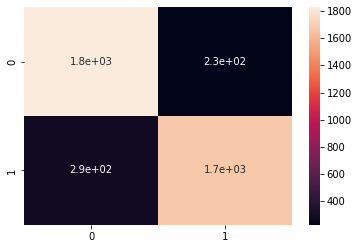

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
cm = confusion_matrix(y_test1.astype('int'), y_test1_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

Text(0.5, 1.0, 'ROC curve for Gaussian Naive Bayes')

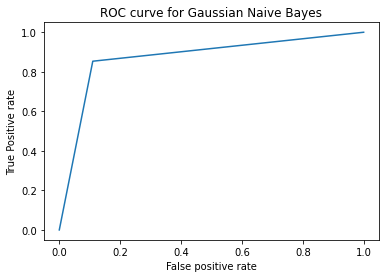

In [22]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test1.astype('int'), y_test1_pred)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve for Gaussian Naive Bayes')

In [25]:
# y_test_pred = list(y_test_pred)
y_test_pred = gnb_0.predict(X_test)
y_test_pred.shape

(5200,)

In [26]:
y_test_pred1 = pd.DataFrame({'id':test_data1['id'],'label':y_test_pred})

y_test_pred1.set_index("id",inplace = True)
y_test_pred1.to_csv("submission1.csv")

In [27]:
y_test_pred.shape

(5200,)

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes = [k for k in range(500, 14001, 500)]
train_sizes, train_scores, validation_scores = learning_curve(estimator = GNB_best_model, X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Gaussian Naive Bayes model', fontsize = 18, y = 1.03)
plt.legend()